1.Define Problem Statement and perform Exploratory Data Analysis (10 points)

To understand the factors on which the demand for the shared electric cycles in the Indian market depends.
Basically to understand which variables are significant in predicting the demand for shared electric cycles in the Indian market and how well those variables describe the electric cycle demands.

In [ ]:
import io
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
path = "/content/drive/MyDrive/Business_case_datasets/bike_sharing.csv"
df = pd.read_csv(path)
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
df.info()
#to get the basic information about the types of data columns present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
df.shape
#gives us the number of rows and columns

(10886, 12)

In [ ]:
df.describe()
#gives us additional info along with some extra statistical data

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
#gives us the count of unique records in the dataframe
df.nunique()

datetime      10886
season            4
holiday           2
workingday        2
weather           4
temp             49
atemp            60
humidity         89
windspeed        28
casual          309
registered      731
count           822
dtype: int64

In [ ]:
#checking how many null values are present in each column in the data
df.isnull().sum()
#great, there are no null values

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [ ]:
df.describe(include="all")

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
unique,10886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,NaN,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,NaN,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,NaN,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000


In [ ]:
#conversion of categorical attributes to 'category'
for col in ['season', 'workingday', 'weather']:
    df[col] = df[col].astype('category')

In [ ]:
df["season"].value_counts()
#count of cycle rental records as per each season

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

In [ ]:
df["workingday"].value_counts()
#if holiday or weekend, working day is 0 else 1
#people tend to use Yulu more on working days than on holidays

1    7412
0    3474
Name: workingday, dtype: int64

In [ ]:
df["weather"].value_counts()
#Yulu bikes are used when weather is clear the most and least in adverse weather conditions

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [ ]:
df["windspeed"].value_counts()
#similar usage(comparable to weather) of Yulu bikes ie more usage in lower wind speeds

0.0000     1313
8.9981     1120
11.0014    1057
12.9980    1042
7.0015     1034
15.0013     961
6.0032      872
16.9979     824
19.0012     676
19.9995     492
22.0028     372
23.9994     274
26.0027     235
27.9993     187
30.0026     111
31.0009      89
32.9975      80
35.0008      58
39.0007      27
36.9974      22
43.0006      12
40.9973      11
43.9989       8
46.0022       3
56.9969       2
47.9988       2
51.9987       1
50.0021       1
Name: windspeed, dtype: int64

In [ ]:
df["holiday"].value_counts()

0    10575
1      311
Name: holiday, dtype: int64

In [ ]:
df2 = df.groupby(["datetime"])["count"].unique()

<AxesSubplot:xlabel='season', ylabel='count'>

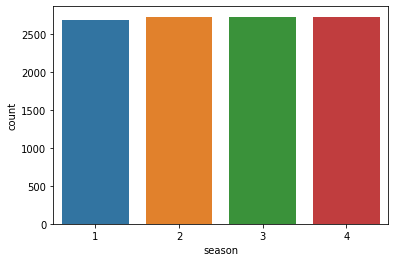

In [ ]:
sns.countplot(x=df["season"])
#counting number of transactions per day as per season

<AxesSubplot:xlabel='workingday', ylabel='count'>

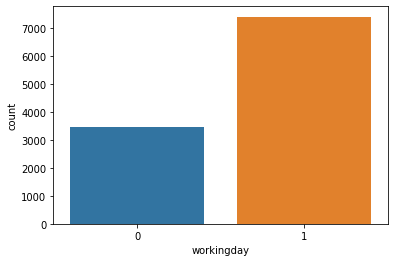

In [ ]:
sns.countplot(x=df["workingday"])
#counting working day and non working day

<AxesSubplot:xlabel='holiday', ylabel='count'>

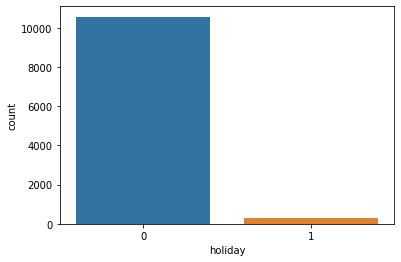

In [ ]:
sns.countplot(x=df["holiday"])
#counting holiday and no holiday

<AxesSubplot:xlabel='weather', ylabel='count'>

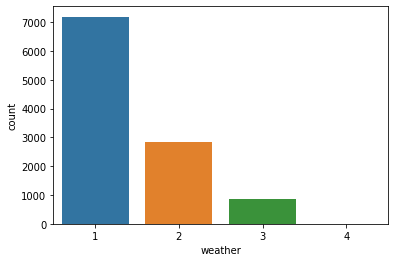

In [ ]:
sns.countplot(x=df["weather"])
#column 4 value is actually 1

<AxesSubplot:xlabel='temp', ylabel='count'>

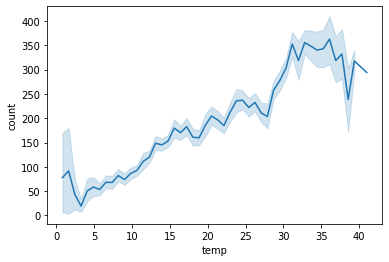

In [ ]:
sns.lineplot(data=df, x=df["temp"], y=df["count"])
#just a lineplot of temp and count of bikes rented

<AxesSubplot:xlabel='atemp', ylabel='count'>

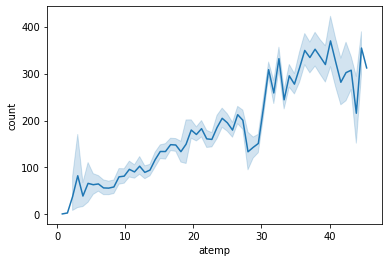

In [ ]:
sns.lineplot(data=df, x=df["atemp"], y=df["count"])

Both lineplots are almost same as temp and atemp have same behaviour on human usage of bikes

<AxesSubplot:xlabel='humidity', ylabel='windspeed'>

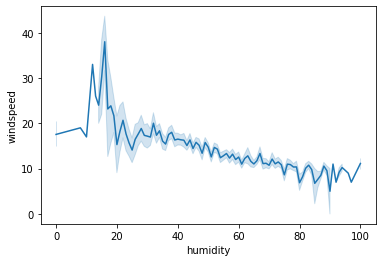

In [ ]:
sns.lineplot(data=df, x=df["humidity"],y=df["windspeed"])
#not really useful data but just some analysis

<AxesSubplot:ylabel='count'>

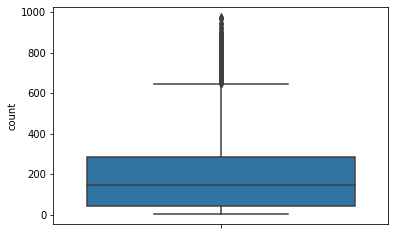

In [ ]:
sns.boxplot(y=df['count'])]#boxplot of count of bikes rented which shows outliers if any

<AxesSubplot:ylabel='temp'>

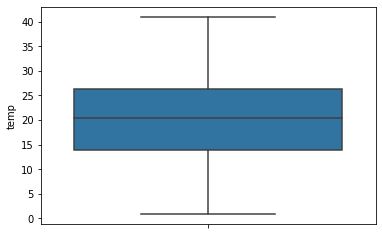

In [ ]:
sns.boxplot(y=df['temp'])
#boxplot of temperature.....no outliers detected

<AxesSubplot:ylabel='humidity'>

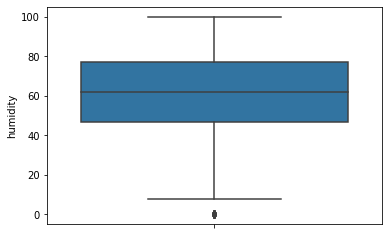

In [ ]:
sns.boxplot(y=df['humidity'])
#box plot of humidity..few negative outliers detected

<AxesSubplot:ylabel='windspeed'>

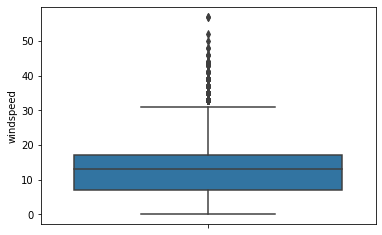

In [ ]:
sns.boxplot(y=df['windspeed'])
#boxplot of windspeed...shows a lot of outliers

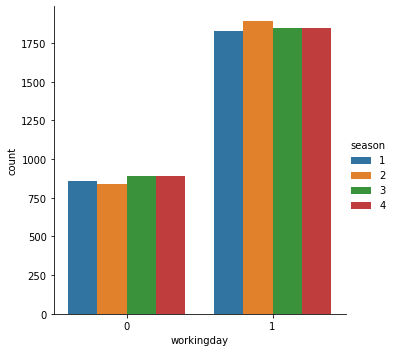

In [ ]:
sns.catplot(x ="workingday", hue ="season", kind ="count", data = df)
#category plot for different seasons and working day

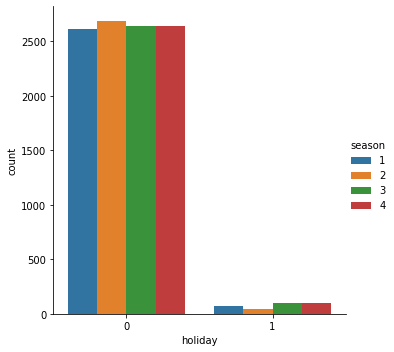

In [ ]:
sns.catplot(x ="holiday", hue ="season", kind ="count", data = df)
#category plot for different seasons and holidays

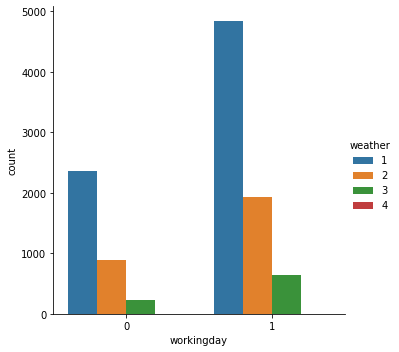

In [ ]:
sns.catplot(x ="workingday", hue ="weather", kind ="count", data = df)
#category plot of working days and count with weather as the hue

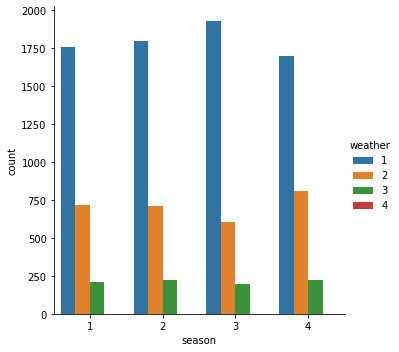

In [ ]:
sns.catplot(x ="season", hue ="weather", kind ="count", data = df)
#category plot of seasons and count with weather as the hue

<AxesSubplot:xlabel='workingday', ylabel='count'>

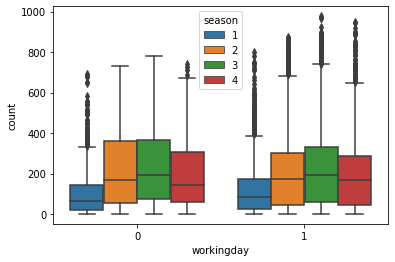

In [ ]:
sns.boxplot(x='workingday', y='count', data=df, hue='season')
#box plot for count and working days in particular season

<AxesSubplot:xlabel='holiday', ylabel='count'>

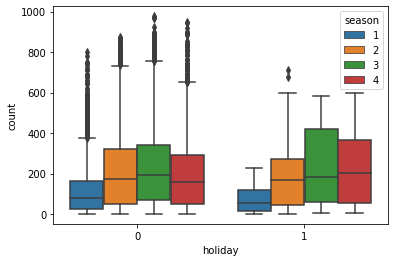

In [ ]:
sns.boxplot(x='holiday', y='count', data=df, hue='season')
#box plot for count and holidays with season as hue

<AxesSubplot:xlabel='workingday', ylabel='count'>

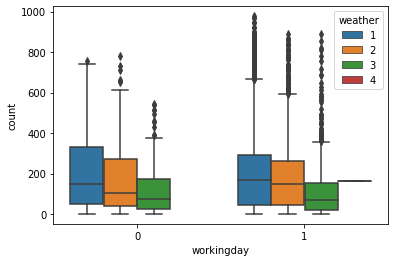

In [ ]:
sns.boxplot(x='workingday', y='count', data=df, hue='weather')
#box plot for count and working days with weather as hue

<AxesSubplot:xlabel='holiday', ylabel='count'>

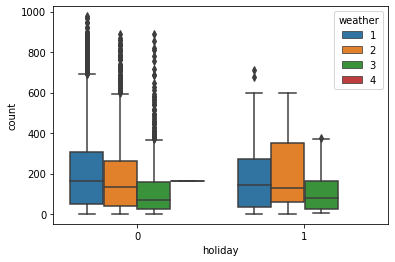

In [ ]:
sns.boxplot(x='holiday', y='count', data=df, hue='weather')
#box plot for count and holidays with weather as hue

<AxesSubplot:xlabel='count', ylabel='Count'>

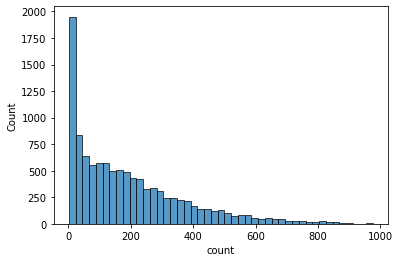

In [ ]:
sns.histplot(x=df1["count"])

In [ ]:
df.corr()
#gives the correlation between two numerical variables

,holiday,temp,atemp,humidity,windspeed,casual,registered,count
holiday,1.000000,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
temp,0.000295,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,-0.005215,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.001929,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,0.008409,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.043799,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,-0.020956,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948
count,-0.005393,0.394454,0.389784,-0.317371,0.101369,0.690414,0.970948,1.000000


<AxesSubplot:>

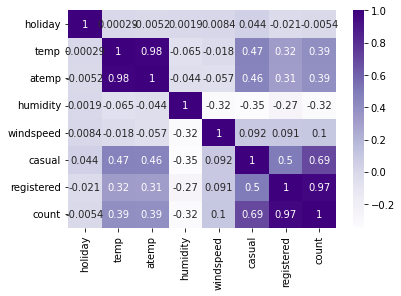

In [ ]:
sns.heatmap(df.corr(),annot=True,cmap="Purples")

In [ ]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


**2- Sample T-Test to check if Working Day has an effect on the number of electric cycles rented **

In [ ]:
df1 = df

In [ ]:
df1['datetime'] =  pd.to_datetime(df1['datetime'])
df1.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
df1['datetime']= df1['datetime'].dt.date
#converting datetime to date so that grouping becomes easy

In [ ]:
df1.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
df_working = df1.loc[df1["workingday"]==1]
df_working.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
47,2011-01-03,1,0,1,1,9.02,9.850,44,23.9994,0,5,5
48,2011-01-03,1,0,1,1,8.20,8.335,44,27.9993,0,2,2
49,2011-01-03,1,0,1,1,6.56,6.820,47,26.0027,0,1,1
50,2011-01-03,1,0,1,1,6.56,6.820,47,19.0012,0,3,3
51,2011-01-03,1,0,1,1,5.74,5.305,50,26.0027,0,30,30


In [ ]:
df_nonworking = df1.loc[df1["workingday"]==0]
df_nonworking.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
a_work = df_working.groupby(['datetime'])['count'].mean().to_numpy()
a_nonwork = df_nonworking.groupby(['datetime'])['count'].mean().to_numpy()

Setting up null and alternative hypothesis

H0 = Working and non-working days have no effect on count of bikes booked

Ha = Working and non-working days have effect on count of bikes booked ie number of bikes booked depends on the type of working day

In [ ]:
from scipy.stats import ttest_ind
ttest_ind(a_work, a_nonwork, alternative='two-sided')

Ttest_indResult(statistic=0.5059018263353243, pvalue=0.6131711163413767)

Let's set significance level to 5% ie 0.05
Since p-value > 0.05, we fail to reject the null hypothesis.
Thus we can say that the number of cycles rented does not depend on the type of working day.

In [ ]:
#Let's do the same hypothesis testing but without grouping data based on dates
df_working1 = df.loc[df["workingday"]==1]
df_nonworking1 = df.loc[df["workingday"]==0]

In [ ]:
a_work1 = df_working1['count'].to_numpy()
a_nonwork1 = df_nonworking1['count'].to_numpy()

In [ ]:
ttest_ind(a_work1, a_nonwork1, alternative='two-sided')

Ttest_indResult(statistic=1.2096277376026694, pvalue=0.22644804226361348)

Let's set significance level to 5% ie 0.05
Since p-value > 0.05, we fail to reject the null hypothesis.
Thus we can say that the number of cycles rented does not depend on the type of working day.

ANOVA RELATED DATASETS

In [ ]:
df_s1 = df.loc[df["season"]==1]
df_s1.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
s1_totalcount = df_s1["count"].sum()
s1_totalcount

312498

In [ ]:
df_s2 = df.loc[df["season"]==2]
s2_totalcount = df_s2["count"].sum()
s2_totalcount

588282

In [ ]:
df_s3 = df.loc[df["season"]==3]
s3_totalcount = df_s3["count"].sum()
s3_totalcount

640662

In [ ]:
df_s4 = df.loc[df["season"]==4]
s4_totalcount = df_s4["count"].sum()
s4_totalcount

544034

In [ ]:
#do similar for weather
df_w1 = df.loc[df["weather"]==1]
w1_totalcount = df_w1["count"].sum()
w1_totalcount

1476063

In [ ]:
df_w2 = df.loc[df["weather"]==2]
w2_totalcount = df_w2["count"].sum()
w2_totalcount

507160

In [ ]:
df_w3 = df.loc[df["weather"]==3]
w3_totalcount = df_w3["count"].sum()
w3_totalcount

102089

In [ ]:
df_w4 = df.loc[df["weather"]==4]
w4_totalcount = df_w4["count"].sum()
w4_totalcount

164

In [ ]:
s1_totalcount+s2_totalcount+s3_totalcount+s4_totalcount == w1_totalcount+w2_totalcount+w3_totalcount+w4_totalcount

True

Assumptions for ANOVA test

The group samples have to follow normal dist and KS test will help us to this ie how a ransom variable is indeed Gaussian distributed.

Each sample should be indepenedent

Equal variance of data in different groups.(Levene test can be used here)

If any of above fail, we cannot/should not apply ANOVA and here Levene's test fails and also samples are not normally distributed

We have to go for non-parametric test in this case like Kruskal-Wallis test but we'll proceed ahead with ANOVA :)

ANNOVA to check if No. of cycles rented is similar or different in different 1. weather 2. season

Setting up null and alternate hypothesis for weather case

H0 : The total number of cycles rented is same in all weather conditions

Ha : Atleast one weather condition has different number of cycles rented

In [ ]:
#for weather
df_w1.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
w1a = df_w1['count'].to_numpy()
#converting the count column present in filtered dataframe ie the weather is 1(clear)

In [ ]:
#similarly doing it for the remaining three weathern conditions
w2a = df_w2['count'].to_numpy()
w3a = df_w3['count'].to_numpy()
w4a = df_w4['count'].to_numpy()

In [ ]:
len(w1a)+len(w2a)+len(w3a)+len(w4a)

10886

In [ ]:
#simply passing these arrays as aruments to the inbuilt Anova function by using appropriate library
from scipy.stats import f_oneway
f_oneway(w1a,w2a,w3a,w4a)

F_onewayResult(statistic=65.53024112793271, pvalue=5.482069475935669e-42)

Let's assume an alpha(significant level) of 0.05

Since p-value(5.482*10e-42) is less than alpha, we reject the null hypothesis.

Therefore, weather has effect on the number of cycles rented by Yulu.

We could also group the data as per date values in particular weather condition ie group data by date 01-01-2011,02-01-2011,03-01-2011 and calculate the average count of cycles rented each day. This is more meaningful but the result will end up same as before ie H0 will be rejected.

In [ ]:
df1_w1 = df1.loc[df1["weather"]==1]
df1_w2 = df1.loc[df1["weather"]==2]
df1_w3 = df1.loc[df1["weather"]==3]
df1_w4 = df1.loc[df1["weather"]==4]

In [ ]:
w1f = df1_w1.groupby(['datetime'])['count'].mean().to_numpy()
w2f = df1_w2.groupby(['datetime'])['count'].mean().to_numpy()
w3f = df1_w3.groupby(['datetime'])['count'].mean().to_numpy()
w4f = df1_w4.groupby(['datetime'])['count'].mean().to_numpy()

In [ ]:
f_oneway(w1f,w2f,w3f,w4f)

F_onewayResult(statistic=8.856249302466853, pvalue=8.566076221278323e-06)

P value is less than alpha, so reject H0

**Setting up null and alternate hypothesis for season case**

H0 : The total number of cycles rented is same in all seasons

Ha : Atleast one season has different number of cycles rented

In [ ]:
s1a = df_s1['count'].to_numpy()
s2a = df_s2['count'].to_numpy()
s3a = df_s3['count'].to_numpy()
s4a = df_s4['count'].to_numpy()

In [ ]:
f_oneway(s1a,s2a,s3a,s4a)

F_onewayResult(statistic=236.94671081032106, pvalue=6.164843386499654e-149)

Let's assume an alpha(significant level) of 0.05

Since p-value(6.164843386499654e-149) is less than alpha, we reject the null hypothesis.

Therefore, season has effect on the number of cycles rented by Yulu.

In [ ]:
#Let's do the same by grouping data by date and calculating mean of count of cycles rented each day seasonwise
df1_s1 = df1.loc[df1["season"]==1]
df1_s2 = df1.loc[df1["season"]==2]
df1_s3 = df1.loc[df1["season"]==3]
df1_s4 = df1.loc[df1["season"]==4]

In [ ]:
s1f = df1_s1.groupby(['datetime'])['count'].mean().to_numpy()
s2f = df1_s2.groupby(['datetime'])['count'].mean().to_numpy()
s3f = df1_s3.groupby(['datetime'])['count'].mean().to_numpy()
s4f = df1_s4.groupby(['datetime'])['count'].mean().to_numpy()

In [ ]:
f_oneway(s1f,s2f,s3f,s4f)

F_onewayResult(statistic=78.87030576574077, pvalue=4.778144979624133e-41)

Same result as before ie reject H0 ie p-value< 0.05

**Chi-square test to check if Weather is dependent on the season**

**Setting up null and alternate hypothesis for chi square test**

H0 : Weather and season are independent

Ha : Weather depends on season

In [ ]:
pd.crosstab(df.weather, df.season)
#creating a contingency table

season,1,2,3,4
weather,,,,
1,1759,1801,1930,1702
2,715,708,604,807
3,211,224,199,225
4,1,0,0,0


In [ ]:
obs = [[1759,1801,1930,1702],[715,708,604,807],[211,224,199,225],[1,0,0,0]]
#creating an array from the contingency table based on values corresponding to each weather condition

In [ ]:
from scipy.stats import chi2_contingency
chi2_contingency(obs)

Chi2ContingencyResult(statistic=49.15865559689363, pvalue=1.5499250736864862e-07, dof=9, expected_freq=array([[1.77454639e+03, 1.80559765e+03, 1.80559765e+03, 1.80625831e+03],
       [6.99258130e+02, 7.11493845e+02, 7.11493845e+02, 7.11754180e+02],
       [2.11948742e+02, 2.15657450e+02, 2.15657450e+02, 2.15736359e+02],
       [2.46738931e-01, 2.51056403e-01, 2.51056403e-01, 2.51148264e-01]]))

Since p-value (1.5499250736864862e-07) is less than significant level (0.05) in this case, the null hypothesis can be rejected.

This means that the Weather is dependent on season.

Summary of hypothesis testing and conclusion

The significance level is taken as 0.05 or 5% for all the tests conducted.

*   Using t-test it is seen that the null hypothesis cannot be rejected.Therefore it implies that the number of cycles rented does not depend on the type of working day.
*   Using ANOVA ,it is seen that the null hypothesis can be rejected for both the seasons and weather case.This means that the number of cycle rentals depends on both seasons and weather.(Tests are conducted separately)
* Using the chi-square test it can be said that season has significant influence on weather.So the initial asssumption(null hypothesis) can be rejected.

